In [1]:
import sys
sys.path.append('..')
import copy

from star_spin_down import *

import struct

import pickle
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

In [2]:
with open('../kroupa2013_norm.pickle', 'rb') as f:
    norm = pickle.load(f)

v_imf = np.vectorize(imf_kroupa2013_unnorm, otypes=[float])

width = 1e-3
masses = np.arange(0.07, 150, width)
pdf = v_imf(masses)/norm

print('Integral of PDF: {:.6f}'.format(np.trapz(pdf, masses))) # this shold be close to 1

cdf = np.zeros(masses.shape)
for i,m in enumerate(masses):
    # this works b/c the last value in the array starts at zero anyways...
    cdf[i] += cdf[i-1]+(width*v_imf(m)/norm)


Integral of PDF: 1.000012


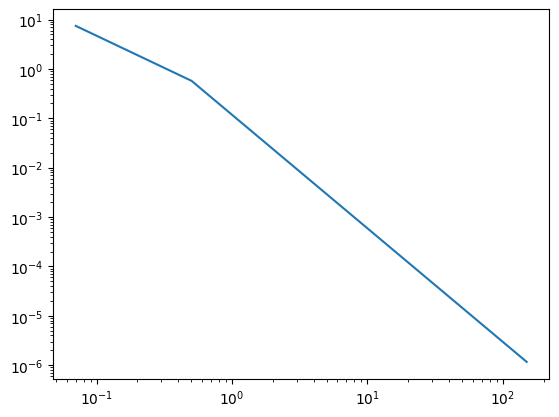

In [3]:
fig, ax = plt.subplots()

ax.plot(masses, pdf)

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

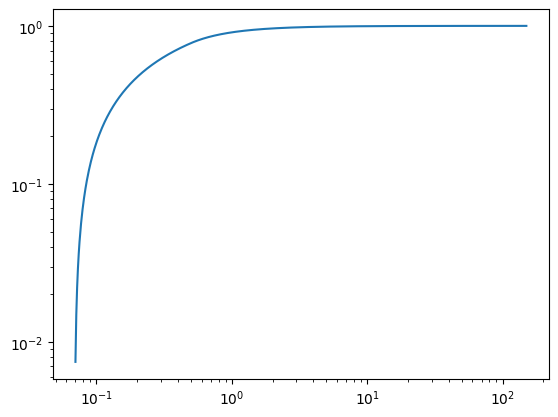

In [4]:
fig, ax = plt.subplots()

ax.plot(masses, cdf)

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

In [5]:
def find_nearest(arr, val):
    arr = np.asarray(arr)
    i = (np.abs(arr - val)).argmin()
    return i, arr[i]

NameError: name 'random_val' is not defined

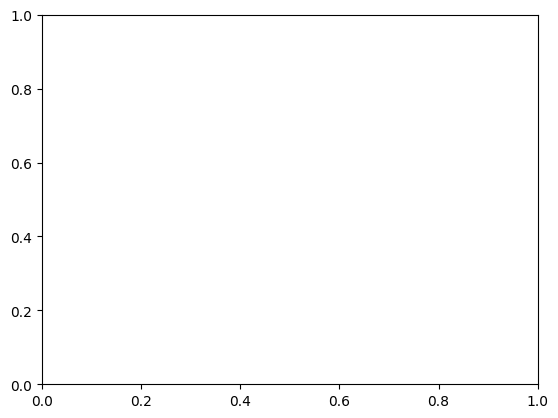

In [7]:
fig, ax = plt.subplots()

ax.axhline(random_val)
ax.plot(masses, cdf)

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

In [8]:
class Star:
    def __init__(self, m, p):
        self.mass = m
        self.period = p
        
    def __init__(self):
        self.mass = None
        self.period = None

In [9]:
n_stars = 1e4
stars = []
for i in range(int(n_stars)):
    stars.append(Star())

In [10]:
mass_bins = [0.3, 0.4, 0.5, 0.8, 1.0]
mass_bin_width = 0.75

n_masses = 1e4

bin_counter = {}
for mb in mass_bins:
    bin_counter[mb] = 0

n_random_masses = 0
while n_random_masses < n_masses:
    
    random_val = np.random.uniform()
    nearest_index, _ = find_nearest(cdf, random_val)
    imf_rand_mass = masses[nearest_index]
    
    for mb in mass_bins:
        if mb-mass_bin_width/2 < imf_rand_mass < mb+mass_bin_width/2:
            bin_counter[mb] += 1
            stars[n_random_masses].mass = mb
            
            n_random_masses += 1
            break
            
mean_period = 8
lower_lim = 0.5
upper_lim = 18.5
std_period = 6

xs = np.linspace(lower_lim, upper_lim, 1000)
period_pdf = truncnorm.pdf(xs, lower_lim-mean_period, upper_lim+mean_period, loc=mean_period, scale=std_period)



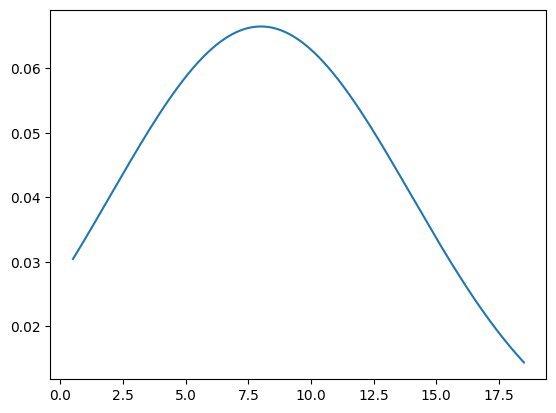

In [11]:
fig, ax = plt.subplots()

ax.plot(xs, period_pdf)

plt.show()

In [12]:
a, b = (lower_lim - mean_period) / std_period, (upper_lim - mean_period) / std_period
rvs = truncnorm.rvs(a, b, loc=mean_period, scale=std_period, size=1000000)


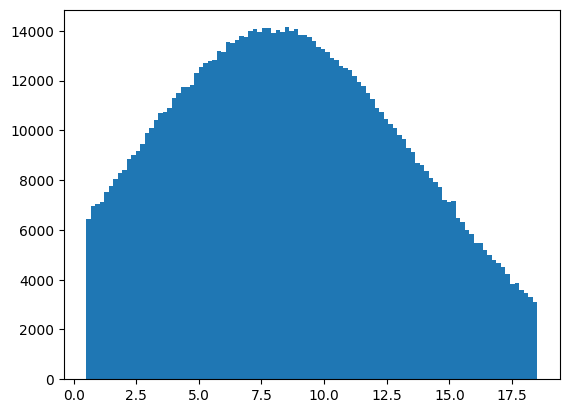

In [13]:
fig, ax = plt.subplots()

ax.hist(rvs, bins=100)

plt.show()

In [186]:
def read_stars_dat(filename):
    with open(filename,'rb') as f:

        n_iter = struct.unpack('>I', f.read(4))[0]
        dt = struct.unpack('>d', f.read(8))[0]
        n_stars = struct.unpack('>I', f.read(4))[0]
        
        star_times_series = []
        for _ in range(n_stars):            
            frame = []
            for _ in range(n_iter+1):
                s = {}
                s['age'] = (struct.unpack('>d', f.read(8))[0])
                s['mass'] = (struct.unpack('>d', f.read(8))[0])
                s['radius'] = (struct.unpack('>d', f.read(8))[0])
                s['inertia'] = (struct.unpack('>d', f.read(8))[0])
                s['period'] = (struct.unpack('>d', f.read(8))[0])
                s['rot_vel'] = (struct.unpack('>d', f.read(8))[0])
                s['ang_mom'] = (struct.unpack('>d', f.read(8))[0])
                s['change_in_inertia'] = (struct.unpack('>d', f.read(8))[0])            
                frame.append(s)
            star_times_series.append(frame)

    return n_iter, dt, n_stars, star_times_series

In [192]:
filename = '../stars.dat'
n_iter, dt, n_stars, star_times_series = read_stars_dat(filename)
times = np.linspace(0, dt*n_iter, n_iter+1)


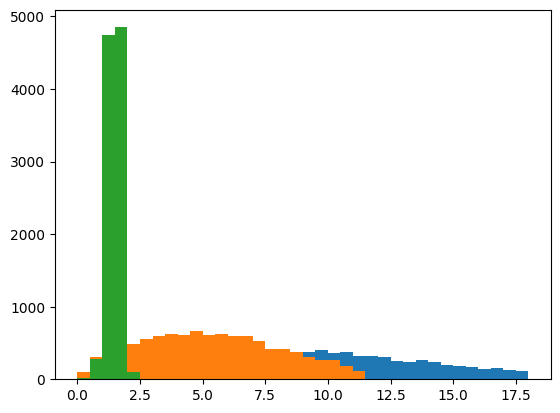

In [202]:
initial_periods = [star[0]['period']*365 for star in star_times_series]
mid_periods = [star[10]['period']*365 for star in star_times_series]
final_periods = [star[-50]['period']*365 for star in star_times_series]
bins = np.arange(0,18.5,0.5)

fig, ax = plt.subplots()

ax.hist(initial_periods, bins=bins)
ax.hist(mid_periods, bins=bins)
ax.hist(final_periods, bins=bins)

plt.show()

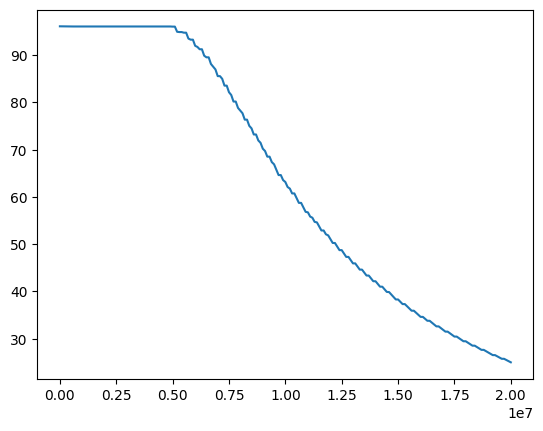

In [194]:
fig, ax = plt.subplots()


ang_mom = [el['ang_mom'] for el in star_times_series[0]]
ax.plot(times,ang_mom)
plt.show()

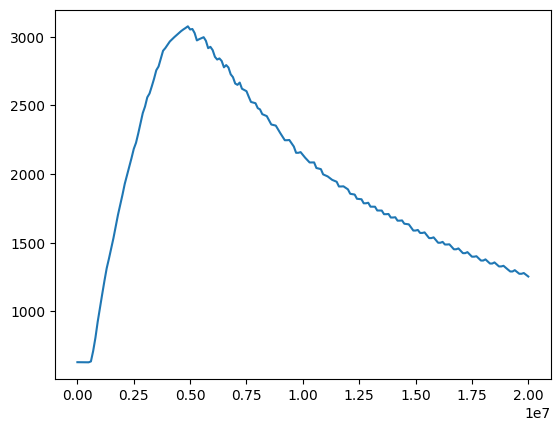

In [195]:
fig, ax = plt.subplots()


ang_mom = [el['rot_vel'] for el in star_times_series[1]]
ax.plot(times,ang_mom)
plt.show()

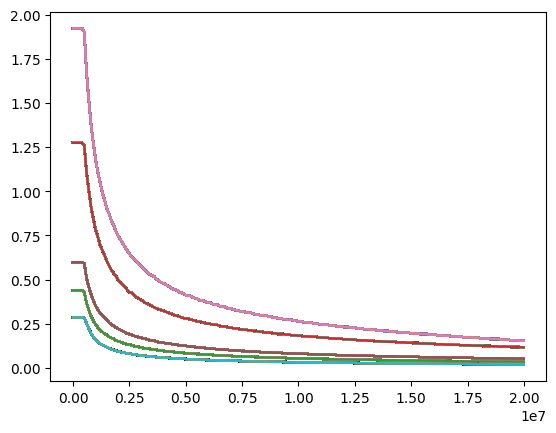

In [196]:
fig, ax = plt.subplots()


for sts in star_times_series:
    vals = [el['inertia'] for el in sts]
    ax.plot(times,vals)
plt.show()

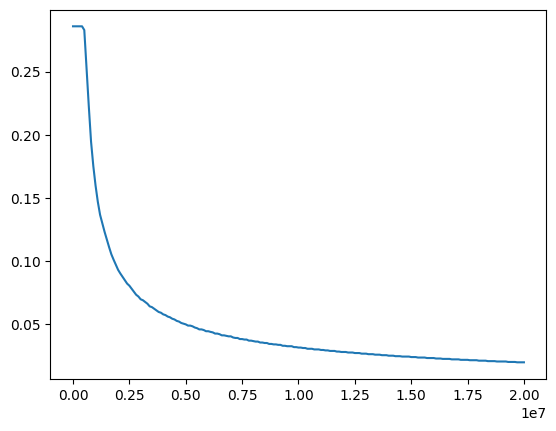

In [197]:
fig, ax = plt.subplots()


period = [el['inertia'] for el in star_times_series[1]]
ax.plot(times,period)
plt.show()